In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('dataset.csv', index_col= 0)

In [3]:
education_values = 4
replacement_value = 0

In [4]:
#changing education values from
df.EDUCATION = np.where((df.EDUCATION >= education_values),replacement_value,df.EDUCATION)

In [5]:
#renaming default payment column to something smaller
df = df.rename(columns = {'default payment next month' : 'default'})
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
#create dummy variables
df = pd.get_dummies(df, columns = ['SEX','EDUCATION','MARRIAGE'],drop_first=True)

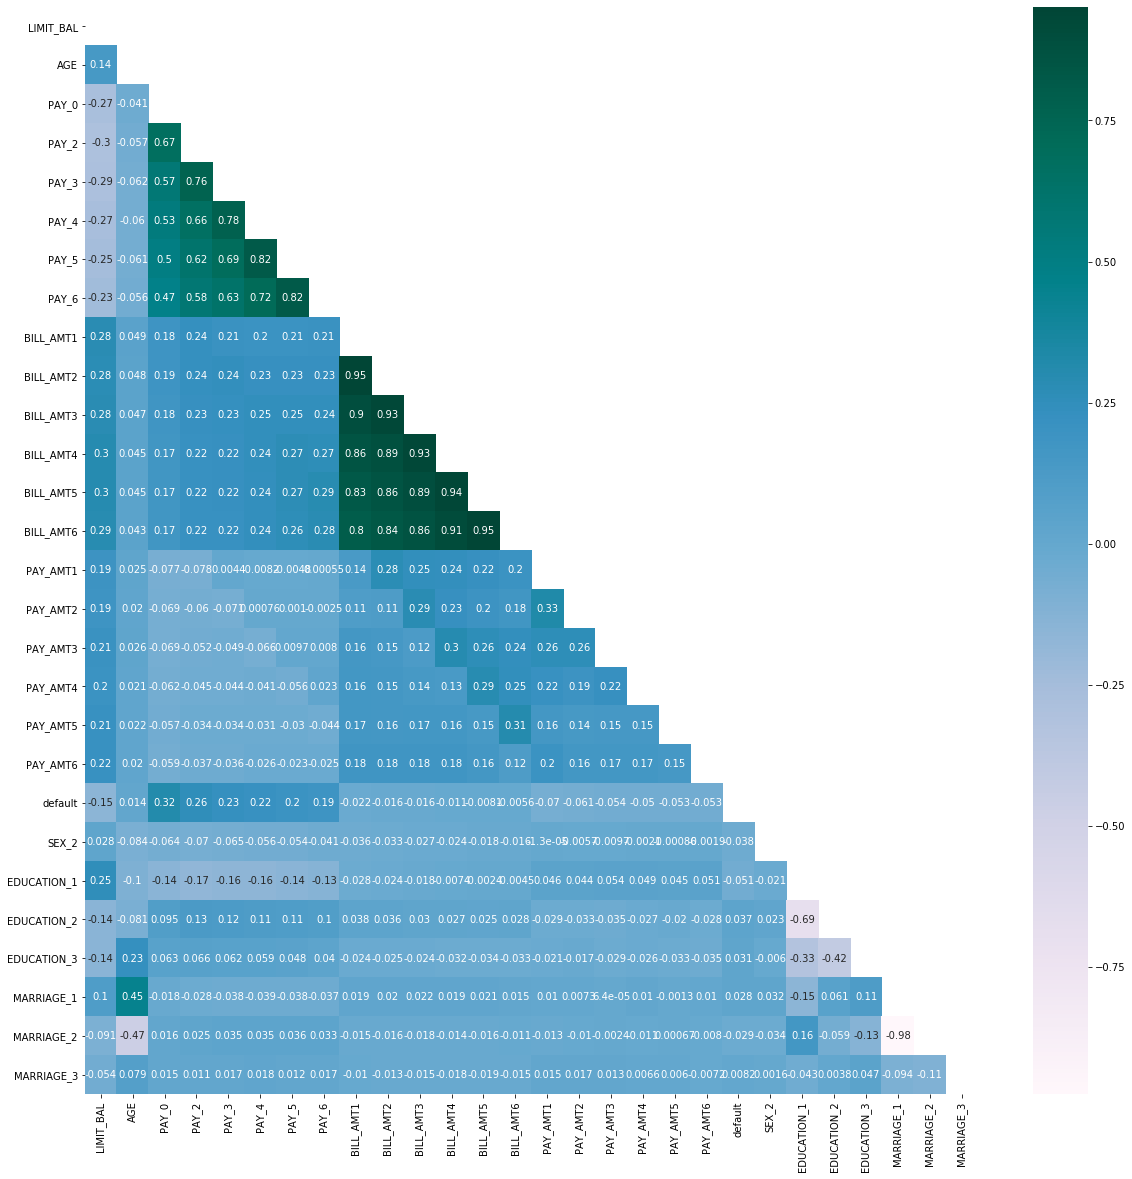

In [7]:
#correlation Test
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax2 = plt.subplots(figsize=(20, 20))
ax2 = sns.heatmap(corr,mask=mask,cmap="PuBuGn",annot = True)

In [8]:
#creating x and y feature columns
X = df.drop(['default'],axis=1)
y = df.default

In [9]:
#Train Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [12]:
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.7971555555555555


In [13]:
print('F1 Score:' + str(metrics.f1_score(y_test, y_pred_class)))

F1 Score:0.4187468160978095


In [14]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [15]:
#create dummy variables
df = pd.get_dummies(df, columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],drop_first=True)

In [16]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PA

In [17]:
#creating x and y feature columns
X = df.drop(['default'],axis=1)
y = df.default

In [18]:
#Train Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [21]:
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.8005333333333333


In [22]:
print('F1 Score:' + str(metrics.f1_score(y_test, y_pred_class)))

F1 Score:0.4367469879518073


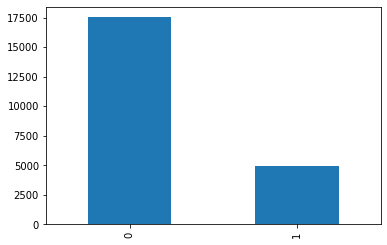

In [28]:
df.default.value_counts().plot(kind='bar')

In [30]:
#Train Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)  
X_test_scaler = scaler.transform(X_test)

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf_scaler = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf_scaler = clf_scaler.fit(X_train_scaler,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)
y_scaler_train = clf_scaler.predict(X_train_scaler)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)
y_scaler_test = clf_scaler.predict(X_test_scaler)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

print("Scaler Training F1 Score:",metrics.f1_score(y_train, y_scaler_train))
print("Scaler Testing F1 Score:",metrics.f1_score(y_test, y_scaler_test))

Training F1 Score: 0.9991995731056563
Testing F1 Score: 0.41196777905638665
Scaler Training F1 Score: 0.9991995731056563
Scaler Testing F1 Score: 0.40199081163859113


In [46]:
# creating our parameters to test
# create a parameters dictionare that will loop over a range of 1-20 for the 'max_depth' parameter
parameters={
    'max_depth': list(range(1,21)),
    'criterion': ['gini','entropy'],
    'min_samples_split': range(2,21,1)
}


In [47]:
#create our estimaor
tree = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(tree, parameters, cv=10, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 1

In [48]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.4667816613677063
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 14}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [49]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.4484062668827661


In [41]:
results={}


In [44]:
results['depth_4']=(grid_tree.best_score_,metrics.f1_score(y_test, y_pred))

In [45]:
results

{'depth_4': (0.46651382316137396, 0.4484062668827661)}